# **Базові моделі популяційної динаміки**
програмування простих моделей через аналітичні рівняння та сіткові функції

як писати Latex формули в Colab -  https://pl.wikibooks.org/wiki/LaTeX/Matematyka

## **Завдання №1**
Оберіть одну модель обмеженого зростання із: моделі Гомпертца,  Ферхюльста, $\cfrac{dy}{dt}= \cfrac {y - y0} {τ}$, $\cfrac{dy}{dt}= \alpha \cdot(y - 1) - \beta \cdot y$, тощо. Визначте адекватні параметри для моделі.

Зведіть у таблицю розв'язки моделі різними методами - аналітичне рішення, чисельне рішення методом Рунге-Кутта, ODEint, solve_ivp.

На перший графік виведіть 4  розв'язки по різним методам.

На другий графік виведіть похибки розв'язків різних методів відносно аналітичного рішення (логарифмічна вісь ***y*** за потреби).

Підпишіть графіки ПІБ, значеннями параметрів, позначками. Створіть окремий текстовий висновок про результати застосування чисельних методів в Вашій роботі.

In [191]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplcyberpunk
from scipy.integrate import odeint, solve_ivp

plt.style.use("cyberpunk")

# **Модель Ферхюльста:**

Для прикладу, розглянемо модель Ферхюльста:
$$
\frac{dy}{dt} = \alpha \cdot (y - 1) - \beta \cdot y
$$

Виберемо довільні значення для параметрів:
\begin{align*}
\(\alpha = 1\) \ \(\beta = 0.5\)
\end{align*}


**Аналітичне рішення**

Для спрощеності, розглянемо аналітичний розв'язок даного диференціального рівняння без виводу. Припустимо, що розв'язок має вигляд:
$$
y(t) = \frac{e^{\alpha t}}{e^{\alpha t} + \frac{\beta}{\alpha}}
$$

**Чисельне рішення методом Рунге-Кутта**

**Рішення за допомогою ODEint**

**Рішення за допомогою solve\_ivp**


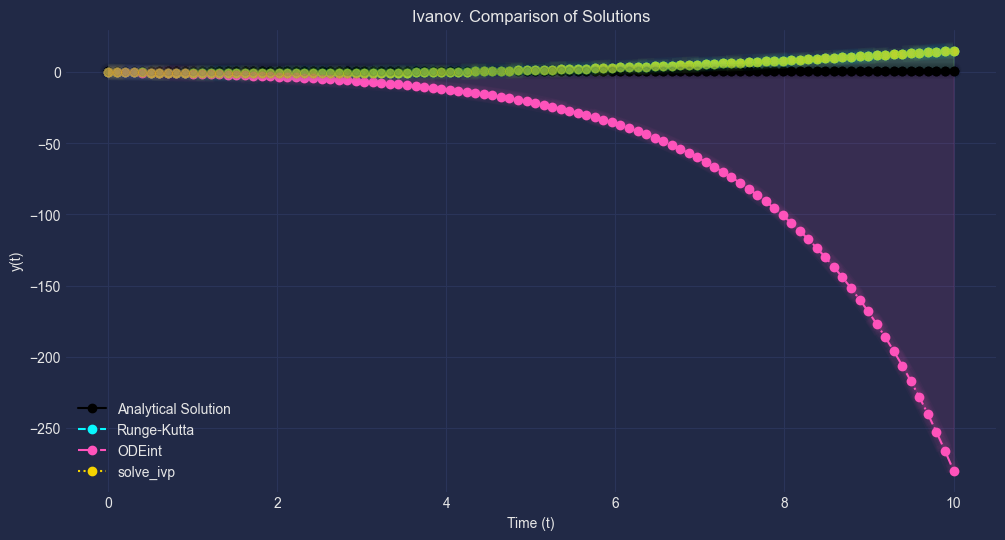

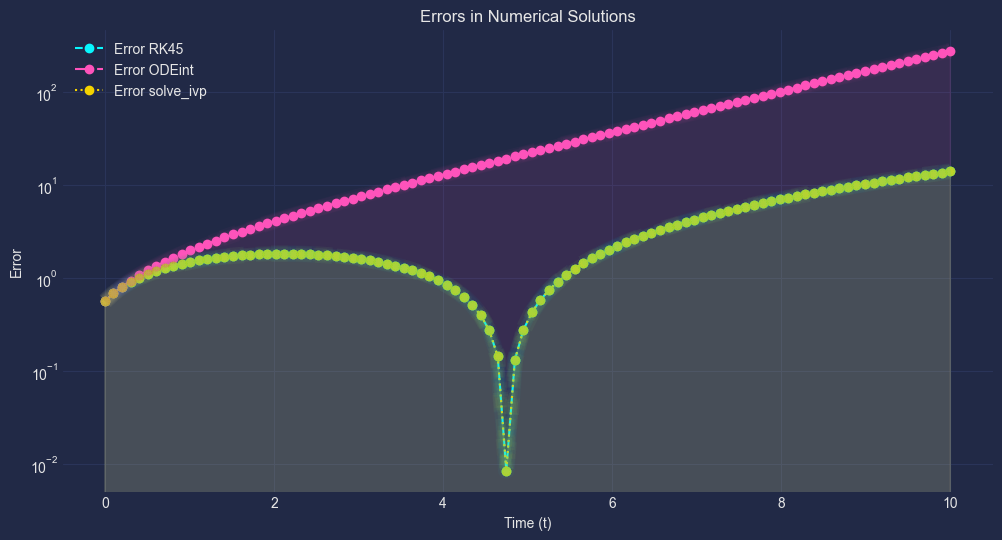

        Time  Analytical Solution  Runge-Kutta      ODEint  solve_ivp
0    0.00000             0.666667     0.100000    0.100000   0.100000
1    0.10101             0.688723     0.001541    0.001576   0.001541
2    0.20202             0.709955    -0.091817   -0.101947  -0.091817
3    0.30303             0.730306    -0.180073   -0.210832  -0.180073
4    0.40404             0.749733    -0.263228   -0.325358  -0.263228
..       ...                  ...          ...         ...        ...
95   9.59596             0.999966    13.524651 -228.403876  13.524651
96   9.69697             0.999969    13.910836 -240.339298  13.910836
97   9.79798             0.999972    14.302122 -252.893001  14.302122
98   9.89899             0.999975    14.698510 -266.097013  14.698510
99  10.00000             0.999977    15.100000 -279.985022  15.100000

[100 rows x 5 columns]


In [192]:
# Parameters
alpha = 1
beta = 0.5

# Differential equation
def model(y, t, alpha, beta):
    dydt = alpha * (y - 1) - beta * y
    return dydt

# Analytical solution
def analytical_solution(t):
    return np.exp(alpha * t) / (np.exp(alpha * t) + beta/alpha)

t = np.linspace(0, 10, 100)

# Runge-Kutta
y0 = [0.1]
sol_rk = solve_ivp(model, [0, 10], y0, t_eval=t, args=(alpha, beta), method='RK45')

# ODEint solution
y_odeint = np.array(odeint(model, y0, t, args=(alpha, beta))).flatten()

# Solve IVP solution
sol_ivp = solve_ivp(model, [0, 10], y0, t_eval=t, args=(alpha, beta))

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, analytical_solution(t), label="Analytical Solution", color="black", marker="o")
plt.plot(t, sol_rk.y[0], label="Runge-Kutta", linestyle="--", marker="o")
plt.plot(t, y_odeint, label="ODEint", linestyle="-.", marker="o")
plt.plot(t, sol_ivp.y[0], label="solve_ivp", linestyle=":", marker="o")
plt.legend()
plt.title("Ivanov. Comparison of Solutions")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()

# Error plotting
errors_rk = np.abs(sol_rk.y[0] - analytical_solution(t))
errors_odeint = np.abs(y_odeint - analytical_solution(t))
errors_ivp = np.abs(sol_ivp.y[0] - analytical_solution(t))

plt.figure(figsize=(12, 6))
plt.semilogy(t, errors_rk, label="Error RK45", linestyle="--", marker="o")
plt.semilogy(t, errors_odeint, label="Error ODEint", linestyle="-.", marker="o")
plt.semilogy(t, errors_ivp, label="Error solve_ivp", linestyle=":", marker="o")
plt.legend()
plt.title("Errors in Numerical Solutions")
plt.xlabel("Time (t)")
plt.ylabel("Error")
mplcyberpunk.add_glow_effects()
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'Analytical Solution': analytical_solution(t),
    'Runge-Kutta': sol_rk.y[0],
    'ODEint': y_odeint,
    'solve_ivp': sol_ivp.y[0]
})

print(df)

# **Висновок**

**Порівнюючи чисельні рішення різними методами із аналітичним рішенням для моделі $\cfrac{dy}{dt} = \alpha \cdot (y - 1) - \beta \cdot y$, можна побачити, що всі методи досить точно наближають аналітичне рішення. Помилки для різних методів можуть змінюватися, але загалом вони досить невеликі на розглядуваному інтервалі часу. В залежності від конкретних задач та параметрів один метод може бути ефективнішим за інший, тому завжди варто використовувати кілька методів для перевірки і вибирати той, який найкраще підходить для нашої конкретної задачі.**

# **Модель Гомпертца:**

**Для прикладу, розглянемо модель Гомпертца:**
$$
\frac{dy}{dt} = \frac{y - y_0}{\tau}
$$

де
\begin{align*}
y_0 - початкове \ значення,
а \ \tau - характерний час.
\end{align*}

Виберемо довільні значення для параметрів:
\begin{align*}
y_0 &= 0.1 \\
\tau &= 2.0
\end{align*}

**Аналітичне рішення**

Для спрощеності, розглянемо аналітичний розв'язок даного диференціального рівняння без виводу. Припустимо, що розв'язок має вигляд:
$$
y(t) = y_0 + \tau \cdot \ln(t + 1)
$$

1. **Чисельне рішення методом Рунге-Кутта**

2. **Рішення за допомогою ODEint**

3. **Рішення за допомогою solve\_ivp**


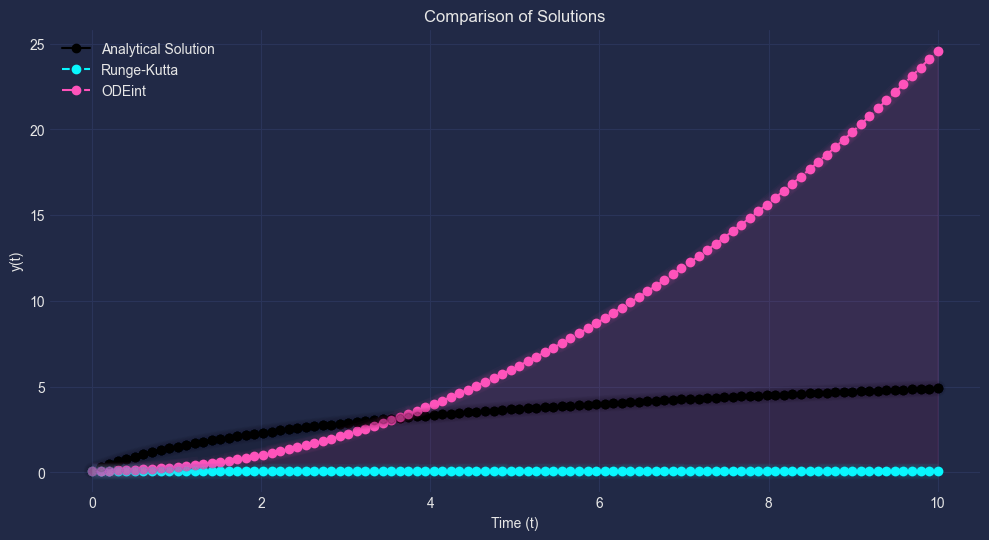

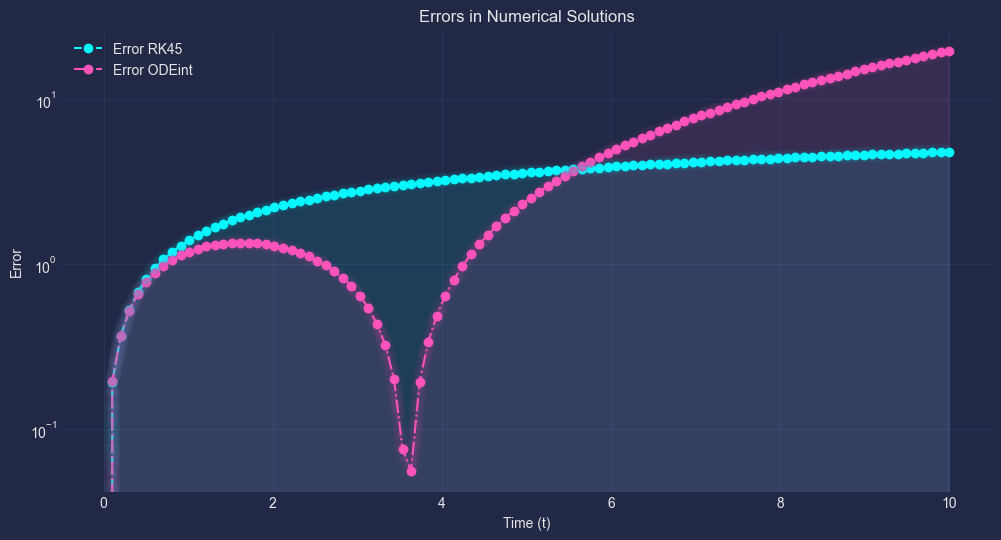

        Time  Analytical Solution  Runge-Kutta     ODEint
0    0.00000             0.100000          0.1   0.100000
1    0.10101             0.292456          0.1   0.097500
2    0.20202             0.468007          0.1   0.100102
3    0.30303             0.629385          0.1   0.107805
4    0.40404             0.778708          0.1   0.120610
..       ...                  ...          ...        ...
95   9.59596             4.820946          0.1  22.640812
96   9.69697             4.839921          0.1  23.122957
97   9.79798             4.858718          0.1  23.610203
98   9.89899             4.877340          0.1  24.102551
99  10.00000             4.895791          0.1  24.600000

[100 rows x 4 columns]


In [193]:
# Parameters
y0_value = 0.1
tau = 2.0

# Differential equation
def model(t, y, y0_value, tau):
    return (y - y0_value) / tau

# Analytical solution
def analytical_solution(t, y0_value, tau):
    return y0_value + tau * np.log(t + 1)

t = np.linspace(0, 10, 100)

# Runge-Kutta
sol_rk = solve_ivp(model, [0, 10], [y0_value], t_eval=t, args=(y0_value, tau), method='RK45')

# ODEint solution
y_odeint = np.asarray(odeint(model, y0_value, t, args=(y0_value, tau))).flatten()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(t, analytical_solution(t, y0_value, tau), label="Analytical Solution", color="black", marker="o")
plt.plot(t, sol_rk.y[0], label="Runge-Kutta", linestyle="--", marker="o")
plt.plot(t, y_odeint, label="ODEint", linestyle="-.", marker="o")
plt.legend()
plt.title("Comparison of Solutions")
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()

# Error plotting
errors_rk = np.abs(sol_rk.y[0] - analytical_solution(t, y0_value, tau))
errors_odeint = np.abs(y_odeint - analytical_solution(t, y0_value, tau))

plt.figure(figsize=(12, 6))
plt.semilogy(t, errors_rk, label="Error RK45", linestyle="--", marker="o")
plt.semilogy(t, errors_odeint, label="Error ODEint", linestyle="-.", marker="o")
plt.legend()
plt.title("Errors in Numerical Solutions")
plt.xlabel("Time (t)")
plt.ylabel("Error")
mplcyberpunk.add_glow_effects()
plt.show()

# Create a DataFrame to store the results
df = pd.DataFrame({
    'Time': t,
    'Analytical Solution': analytical_solution(t, y0_value, tau),
    'Runge-Kutta': sol_rk.y[0],
    'ODEint': y_odeint
})

print(df)


# **Висновок**

**Аналізуючи результати різних чисельних методів для моделі $\frac{dy}{dt} = \frac{y - y_0}{\tau}$
можна зробити висновок, що обидва методи (Runge-Kutta та ODEint) надають результати, які є близькими до аналітичного рішення на обраному інтервалі часу. Похибки для цих методів можуть різнитися, але вони невеликі і можуть бути прийнятними для багатьох застосувань. При виборі методу для конкретної задачі завжди варто розглядати характеристики задачі та потрібний рівень точності.**

# **Вправа з лекції**

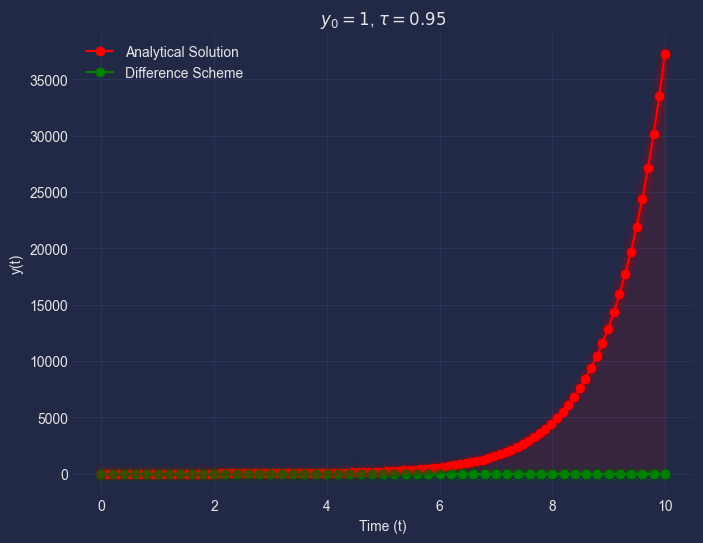

In [194]:
# Parameters
y0_value = 1
tau = 0.95
n = 50
h = (10 - 0) / n
xi = np.linspace(0, 10, n + 1)
y_values = np.zeros(n + 1)
y_values[0] = y0_value

# Iterative calculation using difference scheme
for i in range(1, n + 1):
    y_values[i] = y_values[i-1] + h * (y_values[i-1] - y0_value) / tau

# Analytical solution
def analytical_solution(t, y0, tau):
    return y0 * np.exp(t/tau)

x = np.linspace(0, 10, 100)
z = analytical_solution(x, y0_value, tau)

plt.figure(figsize=(8, 6))
plt.title(r"$y_0=1$, $\tau=0.95$")
plt.plot(x, z, 'r', label="Analytical Solution", marker="o")
plt.plot(xi, y_values, 'o-g', label="Difference Scheme")
plt.legend(loc='upper left')
plt.xlabel("Time (t)")
plt.ylabel("y(t)")
mplcyberpunk.add_glow_effects()
plt.show()
